# Introduction

In this notebook, we will be working with the KS equation object.


In [ ]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Add the directory containing your module to sys.path
#module_path = os.path.abspath(os.path.join('..', r"A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib" ))
#module_path = os.path.abspath(os.path.join('..', r"A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib" ))
#sys.path.append(module_path)

from ks_solver import *


# Initialization

First, we need to initialize the object. This will require the domain, where we will first set the time and spatial domains. In our case, the spatial domain will be $x\in[0,1]$ with $N=100$ points. For the time domain, $t\in[0,1]$. i.e.:


In [ ]:
x = np.linspace( 0 , 1 , num=100 )
t_bounds = (0,10)


The domain will be initialized with a simple trigonometric, $u(x,0)=sin(2\pi x)$ function for now. Thus,


Text(0.5, 1.0, 'Initialization')

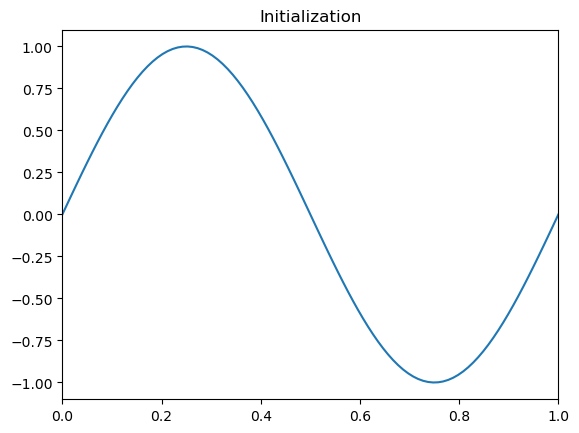

In [ ]:
u_0 = np.sin( 2 * np.pi * x )

plt.plot( x , u_0 )
plt.xlim((np.min(x),np.max(x)))
plt.title("Initialization")


Thus, we know the maximum value for the initialized function is 1. We will let the CFD to test the object out at 0.1. Thus,


In [ ]:
CFL = 0.1
dt = CFL * np.mean( np.gradient( x ) ) / np.max( u_0 )

dt


np.float64(0.0010102281698706687)

For now, we will use the default values for the coefficients and study their effects later on.

Let's pull up the object.


In [ ]:
ks_test = KS( x , u_0 , t_bounds , dt , alpha=-10e-6 , gamma=1e-9 )


# Solve

The initialization needs to be followed by a solve. To do this, we will be using the "solve()" method that the KS object has.

The first thing we need to do is look at the matrices of the solver.


In [ ]:
ks_test.solve( n_xOrder=4 , n_tOrder=4 , bc_xOrder=4 )


RK4 time stepping selected.
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 


c:\Users\mtthl\OneDrive\Documents\Education\[ME - 5653] CFD\git\me5653_CFD_repo\project\ks_solver.py:447: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u[i+1,:] = spsr.linalg.spsolve( cls.D , cls.phi[i,:] )
c:\Users\mtthl\OneDrive\Documents\Education\[ME - 5653] CFD\git\me5653_CFD_repo\project\ks_solver.py:480: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  cls.u[i+1,:] = spsr.linalg.spsolve( cls.D , cls.phi[i,:] )
c:\Users\mtthl\OneDrive\Documents\Education\[ME - 5653] CFD\git\me5653_CFD_repo\project\ks_solver.py:465: RuntimeWarning: overflow encountered in square
  cls.v_2[i,:] = (cls.u_2[i,:] ** 2)/2
c:\Users\mtthl\OneDrive\Documents\Education\[ME - 5653] CFD\git\me5653_CFD_repo\project\ks_solver.py:473: RuntimeWarning: overflow encountered in square
  cls.v_3[i,:] = (cls.u_3[i,:] ** 2)/2
c:\Users\mtthl\OneDrive\Documents\Education\[ME - 5653] CFD\git\me5653_CFD_repo\project\ks_solver.py:436: RuntimeWarning: overflow encount

Hello there


In [ ]:
ks_test.A_advect.toarray()


array([[ -2.08333333,   4.        ,  -3.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  -2.08333333,   4.        , ...,   0.        ,
          0.        ,   0.        ],
       [  8.25      , -66.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         66.        ,  -8.25      ],
       [  0.        ,   0.        ,   0.        , ...,  -4.        ,
          2.08333333,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   3.        ,
         -4.        ,   2.08333333]])

In [ ]:
ks_test.B_diffuse.toarray()


array([[ 2.91666667e+00, -8.66666667e+00,  9.50000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.91666667e+00, -8.66666667e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.16750000e+02,  1.30680000e+04, -2.45025000e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.45025000e+04,  1.30680000e+04, -8.16750000e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.00000000e+00,  2.08333333e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.00000000e+00, -4.00000000e+00,  2.08333333e+00]])

In [ ]:
ks_test.B_third.toarray()


array([[-2.500000e+00,  9.000000e+00, -1.200000e+01, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00, -2.500000e+00,  9.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [-4.851495e+05,  9.702990e+05,  0.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       ...,
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  0.000000e+00,
        -9.702990e+05,  4.851495e+05],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ..., -9.000000e+00,
         2.500000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  1.200000e+01,
        -9.000000e+00,  2.500000e+00]])

In [ ]:
ks_test.B_fourth.toarray()


array([[ 1.00000000e+00, -4.00000000e+00,  6.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -4.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.60596010e+07, -3.84238404e+08,  5.76357606e+08, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.76357606e+08, -3.84238404e+08,  9.60596010e+07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -4.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.00000000e+00, -4.00000000e+00,  1.00000000e+00]])

In [ ]:
ks_test.A.toarray()[-2]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ks_test.B.toarray()[-2]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ks_test.D.toarray()[-2]


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
ks_test.Ee


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ks_test.f[:10]


array([[ 0.        ,  0.        , -0.78904783, -1.16767667, -1.52751805,
        -1.86278229, -2.16807515, -2.43848465, -2.66966005, -2.85788195,
        -3.00012203, -3.09409184, -3.13827962, -3.1319746 , -3.07527843,
        -2.96910357, -2.8151586 , -2.61592073, -2.37459591, -2.09506729,
        -1.7818327 , -1.4399323 , -1.07486747, -0.69251232, -0.29901912,
         0.09928065,  0.4959782 ,  0.88469052,  1.25916313,  1.61337067,
         1.94161389,  2.23861131,  2.49958424,  2.72033366,  2.89730776,
         3.02765914,  3.10929056,  3.14088873,  3.12194542,  3.05276568,
         2.93446284,  2.7689407 ,  2.55886283,  2.3076097 ,  2.01922437,
         1.69834733,  1.3501419 ,  0.98021114,  0.59450766,  0.19923787,
        -0.19923787, -0.59450766, -0.98021114, -1.3501419 , -1.69834733,
        -2.01922437, -2.3076097 , -2.55886283, -2.7689407 , -2.93446284,
        -3.05276568, -3.12194542, -3.14088873, -3.10929056, -3.02765914,
        -2.89730776, -2.72033366, -2.49958424, -2.2

Everything looks formulated correct, but let's check the intermediate points.


# Solution

The first thing we can look at is the derivatives to see if we are getting the inputs to the time stepping as we would expect.


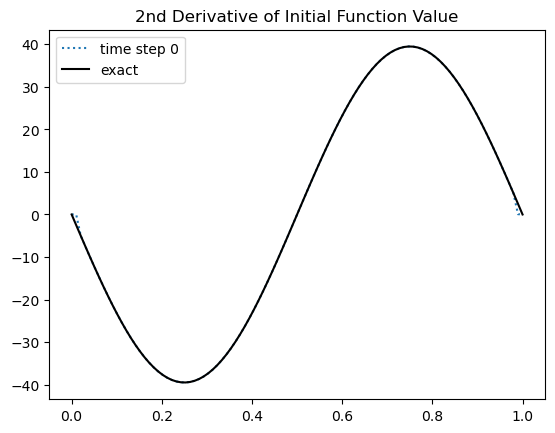

In [ ]:
t_steps = [0]
for i , t in enumerate( t_steps ):
    plt.plot( ks_test.x , ks_test.B_diffuse.dot( ks_test.u[t] ) , ':' , label=f"time step {t}" )
    
# Exact solutions
plt.plot( ks_test.x , - ((2*np.pi)**2) * np.sin( 2 * np.pi * ks_test.x ) , 'k' , label="exact" )

plt.title("2nd Derivative of Initial Function Value")
plt.legend( loc = "best" )


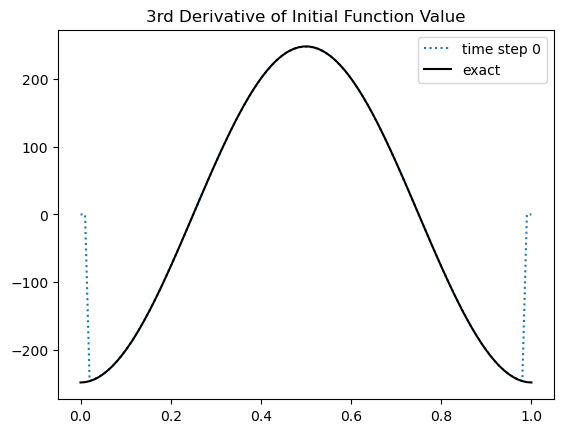

In [ ]:
t_steps = [0]
for i , t in enumerate( t_steps ):
    plt.plot( ks_test.x , ks_test.B_third.dot( ks_test.u[t] ) , ':' , label=f"time step {t}" )
    
# Exact solutions
plt.plot( ks_test.x , - ((2*np.pi)**3) * np.cos( 2 * np.pi * ks_test.x ) , 'k' , label="exact" )

plt.title("3rd Derivative of Initial Function Value")
plt.legend( loc = "best" )


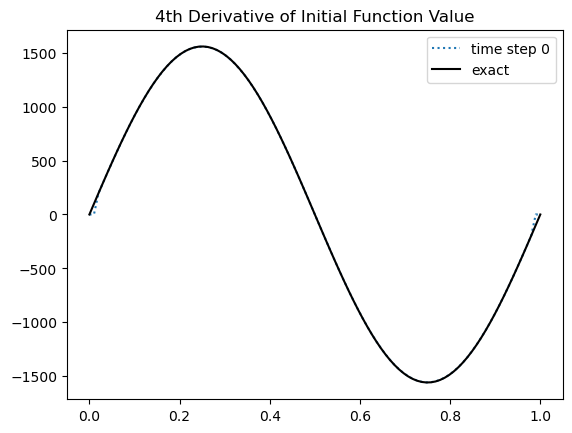

In [ ]:
t_steps = [0]
for i , t in enumerate( t_steps ):
    plt.plot( ks_test.x , ks_test.B_fourth.dot( ks_test.u[t] ) , ':' , label=f"time step {t}" )
    
# Exact solutions
plt.plot( ks_test.x , ((2*np.pi)**4) * np.sin( 2 * np.pi * ks_test.x ) , 'k' , label="exact" )

plt.title("4th Derivative of Initial Function Value")
plt.legend( loc = "best" )


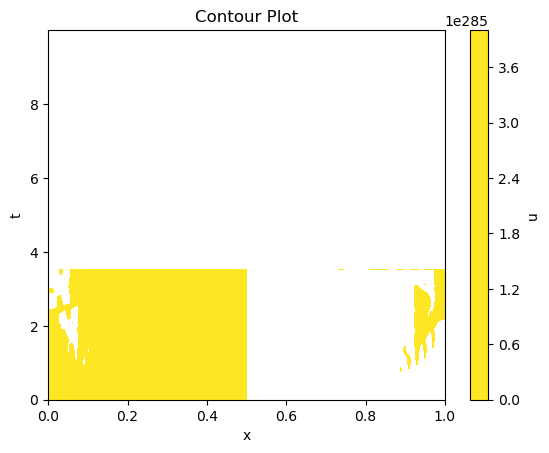

In [ ]:
x = ks_test.x
y = ks_test.t
X , Y = np.meshgrid( x , y )
Z = ks_test.u

# Set the limits for the color scale
contour = plt.contourf(X, Y, Z, levels=25, cmap='viridis', vmin=-1.3, vmax=1.3 )

# Add a colorbar
cbar = plt.colorbar(contour)
cbar.set_label('u')

# Add axis labels
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour Plot')

plt.show()
